In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import yaml

In [2]:
from braid_analysis import braid_filemanager
from braid_analysis import braid_slicing
from braid_analysis import braid_analysis_plots
from braid_analysis import flymath

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.
2024-12-03 10:29:40,116 [INFO] 
Limited Linear Model Support Detected! 
---> PYCHEBFUN is not installed. 
---> Install pychebfun to use chebfun derivatives (https://github.com/pychebfun/pychebfun/) 
You can still use other methods 



# Load data

In [3]:
data_directory = '../20241203_led_demo/'

In [4]:
preprocessed_data_subdir = 'preprocessed_data'
preprocessed_data_fname_suffix = '_preprocessed.hdf'
trajectory_stats_yaml_fname = 'trajectory_statistics.yaml'

In [5]:
preprocessed_directory = os.path.join(data_directory, preprocessed_data_subdir)
preprocessed_data_filename = braid_filemanager.get_filename(preprocessed_directory, 
                                                            preprocessed_data_fname_suffix)
print('Loading: ')
print(preprocessed_data_filename)
df_3d = pd.read_hdf(preprocessed_data_filename)

Loading: 
../20241203_led_demo/preprocessed_data/20241203_084341_preprocessed.hdf


# Print statistics

In [6]:
full_trajectory_stats_yaml_fname = os.path.join(data_directory, preprocessed_data_subdir, trajectory_stats_yaml_fname)
with open( full_trajectory_stats_yaml_fname) as stream:
    stats_yaml = yaml.safe_load(stream)

for key in stats_yaml.keys():
    print(stats_yaml[key]['num_trajecs']['text'])
    print(stats_yaml[key]['num_trajecs']['number'])
    print('-----------------------------')

Number of trajecs before filtering: 
37
-----------------------------
Filtered number of trajecs: 
28
-----------------------------


# Wind tunnel dimensions for scaling

In [7]:
# dimensions of wind tunnel
xmin = -0.75
xmax = 0.75
ymin = -0.3
ymax = 0.3
zmin = 0
zmax = 0.6

# Trajectory length histogram

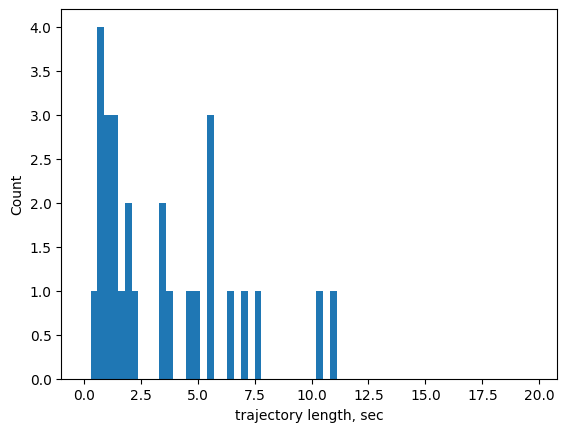

In [8]:
braid_analysis_plots.plot_length_of_trajectories_histogram(df_3d)

# Trajectory speed histogram

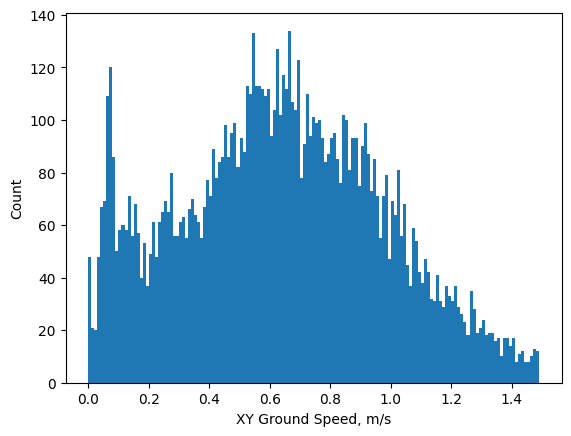

In [9]:
braid_analysis_plots.plot_speed_xy_histogram(df_3d)

# Trajectory starting and ending positions

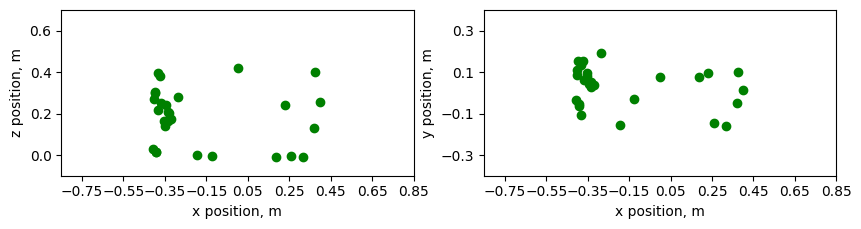

In [10]:
obj_id_key = 'obj_id_unique'
braid_analysis_plots.plot_starting_and_ending_points(df_3d, obj_id_key,
                                                     xmin, 
                                                     xmax, 
                                                     ymin, 
                                                     ymax, 
                                                     zmin, 
                                                     zmax, 
                                                     start_or_end='start')

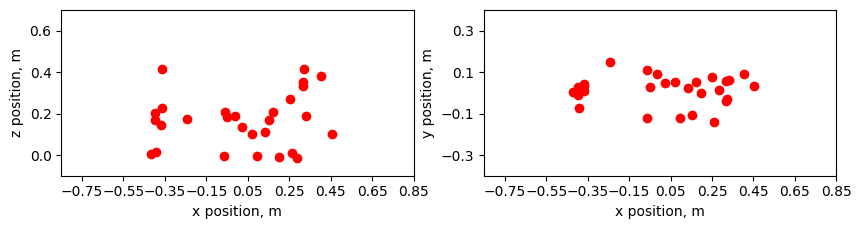

In [11]:
obj_id_key = 'obj_id_unique'
braid_analysis_plots.plot_starting_and_ending_points(df_3d, obj_id_key,
                                                     xmin, 
                                                     xmax, 
                                                     ymin, 
                                                     ymax, 
                                                     zmin, 
                                                     zmax, 
                                                     start_or_end='end')

# Occupancy heatmaps

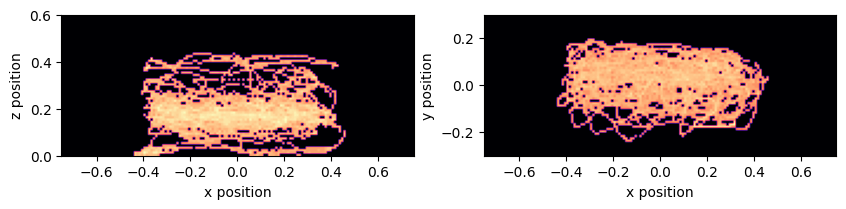

In [12]:
braid_analysis_plots.plot_occupancy_heatmaps(df_3d, xmin, xmax, ymin, ymax, zmin, zmax, 
                        resolution=0.01)

# Individual trajectory traces

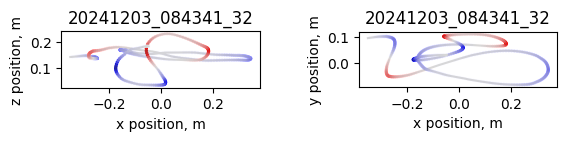

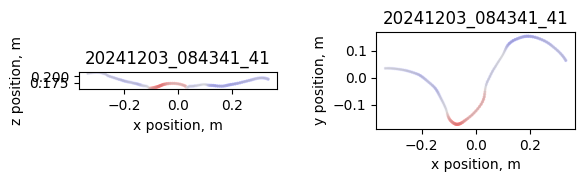

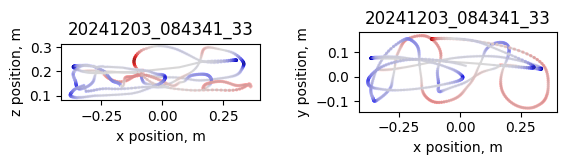

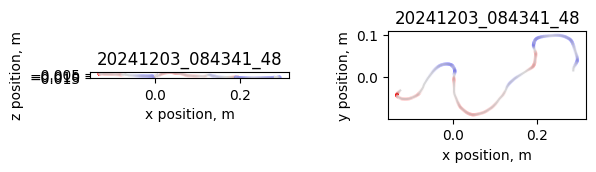

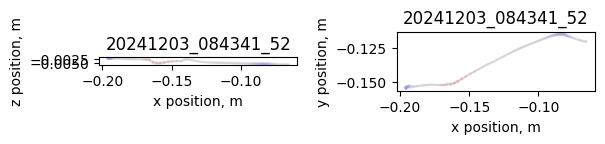

In [13]:
num_trajecs_to_plot = 5

obj_ids = df_3d.obj_id_unique.unique()
obj_ids= np.random.choice(obj_ids, num_trajecs_to_plot, replace=False)

for obj_id in obj_ids:
    fig = plt.figure()
    ax_xz = fig.add_subplot(121)
    ax_xz.set_aspect('equal')
    ax_xz.set_xlabel('x position, m')
    ax_xz.set_ylabel('z position, m')
    
    ax_xy = fig.add_subplot(122)
    ax_xy.set_aspect('equal')
    ax_xy.set_xlabel('x position, m')
    ax_xy.set_ylabel('y position, m')
    
    fig.subplots_adjust(wspace=0.5)
    
    trajec = df_3d[df_3d.obj_id_unique==obj_id]
    braid_analysis_plots.plot_xy_trajectory_with_color_overlay(trajec, 
                                          column_for_color='ang_vel_smoother',
                                          plane = 'xz', # xy or xz or yz
                                          cmap='seismic', 
                                          vmin=-50, vmax=50,
                                          dot_size=2,
                                          ax=ax_xz)
    braid_analysis_plots.plot_xy_trajectory_with_color_overlay(trajec, 
                                          column_for_color='ang_vel_smoother',
                                          plane = 'xy', # xy or xz or yz
                                          cmap='seismic', 
                                          vmin=-50, vmax=50,
                                          dot_size=2,
                                          ax=ax_xy)
    